some part of this notebook are copied from Jose Marcial Portilla works.

# Datasets with PyTorch

## Perform standard imports

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

In [ ]:
# download csv file from github
!wget https://raw.githubusercontent.com/alisharifi2000/LoopAcademyMedicalImageProcessing/main/pytorch/Data/IRIS.csv

--2023-02-18 08:40:49--  https://raw.githubusercontent.com/alisharifi2000/LoopAcademyMedicalImageProcessing/main/pytorch/Data/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv.1’

IRIS.csv.1          100%[===================>]   4.51K  --.-KB/s    in 0s      

2023-02-18 08:40:49 (58.6 MB/s) - ‘IRIS.csv.1’ saved [4617/4617]



In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Plot the data

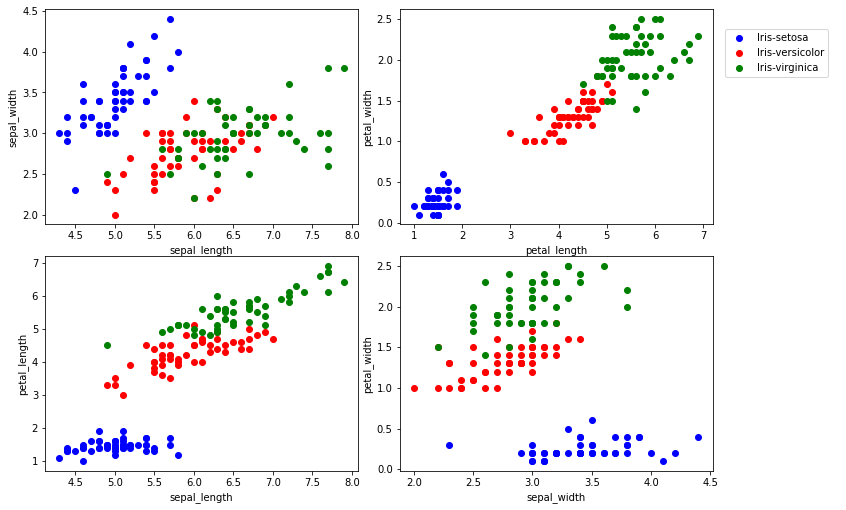

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i, ax in enumerate(axes.flat):
    for j, label in enumerate(labels):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['species']== label][x], df[df['species']== label][y],
                   color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

**hint** we should label encoding or one-hot encoding target. because labels must be numeric and not string!

we can use sklearn package but in this code we use pandas replace method.

In [ ]:
repl = {'Iris-setosa':1, 'Iris-versicolor':2 , 'Iris-virginica':3}

df['species'] = df['species'].replace(repl)
df['species'].unique()

array([1, 2, 3])

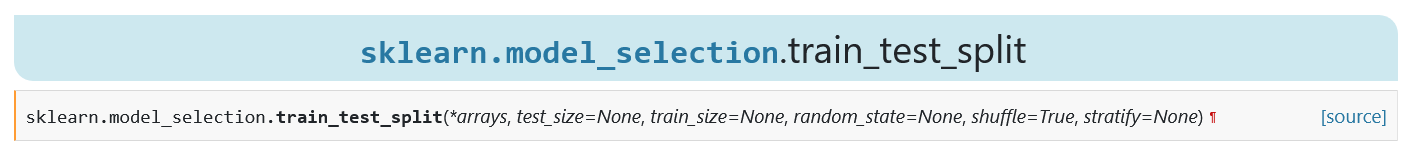

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('species',axis=1).values,
                                                    df['species'].values, test_size=0.2,
                                                    random_state=33)

In [ ]:
test_X.shape

(30, 4)

In [ ]:
X_train = torch.tensor(train_X)
X_test = torch.tensor(test_X)
y_train = torch.tensor(train_y).reshape(-1, 1)
y_test = torch.tensor(test_y).reshape(-1, 1)

In [ ]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([1, 2, 3])
Counts: tensor([42, 42, 36])


<div class="alert alert-success"><strong>NOTE: </strong>The importance of a balanced training set is discussed in <em>A systematic study of the class imbalance problem in convolutional neural networks</em> by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17, latest rev 10/13/18) <a href='https://arxiv.org/abs/1710.05381'>https://arxiv.org/abs/1710.05381</a><br>For example, the authors show that oversampling a less common class so that it matches the more common classes is always the preferred choice.</div>

In [ ]:
X_train.size()

torch.Size([120, 4])

In [ ]:
y_train.size()

torch.Size([120, 1])

## Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('species',axis=1).values
labels = df['species'].values

iris = TensorDataset(torch.tensor(data),torch.tensor(labels))

In [ ]:
len(iris)

150

In [ ]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [ ]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([4.9000, 3.0000, 1.4000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([4.7000, 3.2000, 1.3000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([4.6000, 3.1000, 1.5000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([5.0000, 3.6000, 1.4000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([5.4000, 3.9000, 1.7000, 0.4000], dtype=torch.float64), tensor(1))
(tensor([4.6000, 3.4000, 1.4000, 0.3000], dtype=torch.float64), tensor(1))
(tensor([5.0000, 3.4000, 1.5000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([4.4000, 2.9000, 1.4000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([4.9000, 3.1000, 1.5000, 0.1000], dtype=torch.float64), tensor(1))
(tensor([5.4000, 3.7000, 1.5000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([4.8000, 3.4000, 1.6000, 0.2000], dtype=torch.float64), tensor(1))
(tensor([4.8000, 3.0000, 1.4000, 0.1000], dtype=torch.float64), tensor(1))
(tensor([4.3000, 3.0000, 

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

In [ ]:
iris_loader = DataLoader(iris, batch_size=15, shuffle=True)
print(iris_loader)

In [ ]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[5.6000, 2.5000, 3.9000, 1.1000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.3000, 3.4000, 5.6000, 2.4000]], dtype=torch.float64), tensor([2, 3, 1, 3, 3, 3, 3, 1, 2, 2, 2, 3, 2, 1, 3])]
1 [tensor([[6.1000, 2.9000, 4.7000, 1.4000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.6000, 3.0000, 4.5000, 1

In [ ]:
next(iter(iris_loader))

[tensor([[6.7000, 2.5000, 5.8000, 1.8000],
         [6.1000, 2.9000, 4.7000, 1.4000],
         [5.3000, 3.7000, 1.5000, 0.2000],
         [6.8000, 2.8000, 4.8000, 1.4000],
         [6.4000, 3.2000, 5.3000, 2.3000],
         [6.0000, 2.7000, 5.1000, 1.6000],
         [5.2000, 3.4000, 1.4000, 0.2000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [7.4000, 2.8000, 6.1000, 1.9000],
         [4.8000, 3.0000, 1.4000, 0.3000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [5.5000, 4.2000, 1.4000, 0.2000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [5.7000, 2.9000, 4.2000, 1.3000],
         [5.1000, 3.5000, 1.4000, 0.2000]], dtype=torch.float64),
 tensor([3, 2, 1, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 1])]

In [ ]:
len(list(iris_loader))

10

In [ ]:
print(list(iris_loader))

[[tensor([[4.9000, 3.0000, 1.4000, 0.2000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.3000, 3.7000, 1.5000, 0.2000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [5.0000, 2.3000, 3.3000, 1.0000]], dtype=torch.float64), tensor([1, 2, 1, 2, 3, 2, 3, 1, 2, 1, 2, 1, 3, 3, 2])], [tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.8000, 2.8000, 5.1000, 2.4000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [4.6000, 3.4000, 1.4000, 0.3

In [ ]:
len((list(iris_loader)))

10

In [ ]:
print((iris_loader))

## A Quick Note on Torchvision
PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. We'll go into a lot more detail in the Convolutional Neural Network (CNN) section. For now, just know that torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.

# Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.

lets build custom dataset for iris

In [ ]:
data_path = '/content/IRIS.csv'

In [ ]:
from torch.utils.data import Dataset
class CustomImageDataset(Dataset):
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        record = self.data.iloc[idx]
        features = list(record.drop(index=['species']).values)
        features =  torch.tensor(features)
        label_name = record['species']
        repl = {'Iris-setosa':1, 'Iris-versicolor':2 , 'Iris-virginica':3}
        label = repl[label_name]
        label = torch.tensor([label])
        return features, label

In [ ]:
iris = CustomImageDataset(data_path)

In [ ]:
len(iris)

150

In [ ]:
type(iris)

__main__.CustomImageDataset

In [ ]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([4.9000, 3.0000, 1.4000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([4.7000, 3.2000, 1.3000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([4.6000, 3.1000, 1.5000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([5.0000, 3.6000, 1.4000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([5.4000, 3.9000, 1.7000, 0.4000], dtype=torch.float64), tensor([1]))
(tensor([4.6000, 3.4000, 1.4000, 0.3000], dtype=torch.float64), tensor([1]))
(tensor([5.0000, 3.4000, 1.5000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([4.4000, 2.9000, 1.4000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([4.9000, 3.1000, 1.5000, 0.1000], dtype=torch.float64), tensor([1]))
(tensor([5.4000, 3.7000, 1.5000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([4.8000, 3.4000, 1.6000, 0.2000], dtype=torch.float64), tensor([1]))
(tensor([4.8000, 3.0000, 1.4000, 0.1000], dtype=torch.float64), tensor([1]))

In [ ]:
iris_loader = DataLoader(iris, batch_size=15, shuffle=True)
print(iris_loader)

In [ ]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[7.0000, 3.2000, 4.7000, 1.4000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [6.3000, 2.5000, 4.9000, 1.5000]], dtype=torch.float64), tensor([2, 2, 3, 2, 2, 2, 1, 3, 2, 3, 3, 1, 2, 2, 2])]
1 [tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.3000, 2.7000, 4.9000, 1